In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import pytz
import streamlit as st
from datetime import datetime as dt
from keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense, Conv1D, MaxPooling1D, Flatten
import time
from razdel import sentenize
from natasha import Segmenter
import nltk
from rouge_score import rouge_scorer
from transformers import pipeline, logging
import evaluate
import numpy as np
import time
from nltk.tokenize.toktok import ToktokTokenizer
import sacremoses

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time

# Загрузка данных
def download_stock_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.dropna(inplace=True)
    return df

# Подготовка признаков и целевой переменной
def prepare_data(df):
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)  # Удаляем последнюю строку с NaN в таргете
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    X = df[features]
    y = df['Target']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Оценка модели
def evaluate(y_true, y_pred):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3)
    }

# Основной скрипт
df = download_stock_data()
print(df)
X_train, X_test, y_train, y_test = prepare_data(df)

results = {}

# CatBoost
start = time.time()
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
runtime_cat = round(time.time() - start, 2)
results['CatBoost'] = evaluate(y_test, cat_pred)
results['CatBoost']['Train Time (s)'] = runtime_cat




# Вывод результатов
result_df = pd.DataFrame(results).T
print("\n📊 Сравнительная таблица метрик моделей:\n")
print(result_df[['RMSE', 'MAE', 'R2', 'Train Time (s)']])
#print(cat_pred)
print(cat_pred)
print(y_test)
print(X_test)
print(cat_model.predict(np.array(['Open', 'High', 'Low', 'Close', 'Volume'])))


[*********************100%***********************]  1 of 1 completed


Price             Open        High         Low       Close     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   71.627092   72.681289   71.373218   72.620842  135480400
2020-01-03   71.847102   72.676431   71.689942   71.914803  146322800
2020-01-06   71.034702   72.526526   70.783241   72.487839  118387200
2020-01-07   72.497529   72.753823   71.926915   72.146942  108872000
2020-01-08   71.849525   73.609737   71.849525   73.307503  132079200
...                ...         ...         ...         ...        ...
2025-03-25  220.480877  223.806518  219.791778  223.456970   34493600
2025-03-26  223.217271  224.725303  220.181259  221.239868   34466100
2025-03-27  221.100054  224.695345  220.271139  223.556839   37094800
2025-03-28  221.379691  223.516888  217.394911  217.614624   39818600
2025-03-31  216.725791  225.324516  215.946814  221.839096   65299300

[1318 rows x 5 colu

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time

# Загрузка данных
def download_stock_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.dropna(inplace=True)
    return df

# Подготовка признаков и целевой переменной
def prepare_data(df):
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)  # Удаляем последнюю строку с NaN в таргете
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    X = df[features]
    y = df['Target']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Оценка модели
def evaluate(y_true, y_pred):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3)
    }

# Основной скрипт
df = download_stock_data()
X_train, X_test, y_train, y_test = prepare_data(df)

results = {}





# Вывод результатов
result_df = pd.DataFrame(results).T
print("\n📊 Сравнительная таблица метрик моделей:\n")
#print(result_df[['RMSE', 'MAE', 'R2', 'Train Time (s)']])

[*********************100%***********************]  1 of 1 completed


📊 Сравнительная таблица метрик моделей:



[*********************100%***********************]  1 of 1 completed


Price        Close        High         Low        Open     Volume       Date  \
Ticker        AAPL        AAPL        AAPL        AAPL       AAPL              
0        24.288580   24.757334   23.848706   24.746226  212818400 2015-01-02   
1        23.604332   24.137513   23.417720   24.057535  257142000 2015-01-05   
2        23.606556   23.866481   23.244437   23.668760  263188400 2015-01-06   
3        23.937572   24.037543   23.704305   23.815385  160423600 2015-01-07   
4        24.857306   24.915067   24.148620   24.266365  237458000 2015-01-08   
...            ...         ...         ...         ...        ...        ...   
1505    127.751717  129.185691  127.576119  128.922316   88223700 2020-12-23   
1506    128.736969  130.190472  127.888287  128.102899   54930100 2020-12-24   
1507    133.341354  133.975425  130.239251  130.707502  124486200 2020-12-28   
1508    131.565903  135.389867  131.048888  134.668006  121047300 2020-12-29   
1509    130.444107  132.658500  130.1319

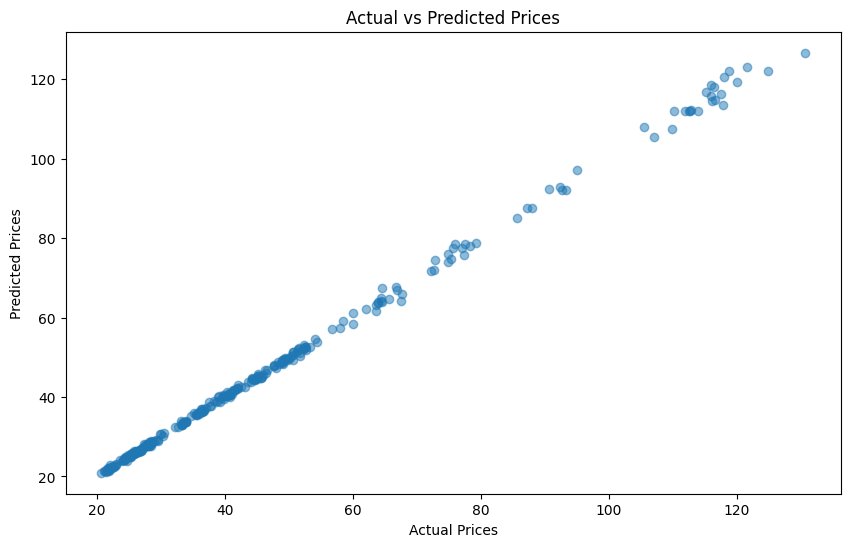

interactive(children=(FloatSlider(value=150.0, description='Open Price:', max=200.0, min=100.0, step=1.0), Flo…

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
# Load the dataset from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start="2015-01-01", end="2020-12-31")

# Display the first few rows of the dataset
data.head()

# Data preparation: Adding 'Date' column and resetting the index
data['Date'] = data.index
data.reset_index(drop=True, inplace=True)

# Feature engineering: Adding more features (Year, Month, Day)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Selecting features and target
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
target = 'Close'
print(data)
# Splitting the data into features (X) and target (y)
X = data[features]
y = data[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)
print(X_test)
print(y_pred)
from sklearn.metrics import mean_absolute_error

# Calculating Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualizing the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Function to make predictions based on user input
def predict_price(open_price, high_price, low_price, volume, year, month, day):
    input_data = np.array([[open_price, high_price, low_price, volume, year, month, day]])
    prediction = model.predict(input_data)
    print(f'Predicted Stock Price: {prediction[0]:.2f}')

# Creating the interactive widgets
open_price_slider = widgets.FloatSlider(value=150, min=100, max=200, step=1, description='Open Price:')
high_price_slider = widgets.FloatSlider(value=155, min=105, max=205, step=1, description='High Price:')
low_price_slider = widgets.FloatSlider(value=145, min=95, max=195, step=1, description='Low Price:')
volume_slider = widgets.FloatSlider(value=50000000, min=10000000, max=100000000, step=1000000, description='Volume:')
year_slider = widgets.IntSlider(value=2020, min=2015, max=2026, step=1, description='Year:')
month_slider = widgets.IntSlider(value=6, min=1, max=12, step=1, description='Month:')
day_slider = widgets.IntSlider(value=15, min=1, max=31, step=1, description='Day:')

# Displaying the widgets and connecting them to the prediction function
interactive_plot = widgets.interactive(predict_price, 
                                       open_price=open_price_slider, 
                                       high_price=high_price_slider, 
                                       low_price=low_price_slider, 
                                       volume=volume_slider, 
                                       year=year_slider, 
                                       month=month_slider, 
                                       day=day_slider)
display(interactive_plot)

In [25]:
# --- Загрузка данных ---
ticker_list = ['META', 'GOOG', 'ORCL', 'MSFT', 'AMZN']# Замените на нужный тикер
ticker = 'GOOG'
tz = pytz.timezone("America/New_York")
start = tz.localize(dt(2023,11,11))
end = tz.localize(dt(2024,11,11))
data = yf.download(ticker, start, end, auto_adjust=True) # Замените на нужный период
# --- Предобработка данных ---
data['Close_Next_Day'] = data['Close'].shift(-1) # Целевая переменная - цена закрытия следующего дня
print(data)
data.dropna(inplace=True)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close_Next_Day'
X = data[features]
y = data[target]
print (X,y)
# --- Подготовка данных для GRU/CNN ---
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length - 1):
        x = data[i:(i + seq_length)].values
        y = data.iloc[i + seq_length +1][target]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10 # Длина последовательности для GRU/CNN
X_rnn, y_rnn= create_sequences(data, seq_length)
print 


# --- Разделение данных ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_rnn, y_rnn, test_size=0.2, shuffle=False)




[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG   
Date                                                                   
2023-11-13  133.009995  133.477780  132.144101  132.731316  16409900   
2023-11-14  134.791565  136.593045  134.463134  135.010529  22317300   
2023-11-15  135.737076  136.194899  134.692023  135.995845  15840900   
2023-11-16  138.046158  138.225317  135.438514  136.314370  17615100   
2023-11-17  136.294464  137.349465  134.841340  137.170321  25565300   
...                ...         ...         ...         ...       ...   
2024-11-04  170.292572  171.529763  169.100292  170.851314  16194000   
2024-11-05  171.020935  171.706372  169.983287  170.442250  12518300   
2024-11-06  177.925201  178.234495  174.642661  174.951970  27061500   
2024-11-07  181.866241  182.165564  178.483937  178.703439  16730400   
2024-11-08  179.451736  181.936090  179.162401  181.586878  1502

In [4]:
models = {
    "CatBoost": CatBoostRegressor(iterations=50, verbose=0, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=50, random_state=42),
  #  "LightGBM": LGBMRegressor(n_estimators=50, random_state=42),
    "GRU": Sequential([
        GRU(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        Dense(1)
    ]),
    "CNN": Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ]),
    "LSTM": Sequential([
        LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        Dense(1)
    ])
}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

# --- Обучение и оценка ---
results = {}

for name, model in models.items():
    start_time = time.time() # Засекаем время начала обучения

    if name in ["LSTM", "GRU", "CNN"]:
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train_rnn if name in ["LSTM", "GRU"] else X_train_rnn, y_train_rnn if name in ["LSTM", "GRU"] else y_train_rnn, epochs=100, batch_size=32, verbose=0)
        preds = model.predict(X_test_rnn if name in ["LSTM", "GRU"] else X_test_rnn).flatten()
        y_true = y_test_rnn if name in ["LSTM", "GRU"] else y_test_rnn

    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        y_true = y_test


    end_time = time.time()
    training_time = end_time - start_time

    rmse = np.sqrt(mean_squared_error(y_true, preds))
    mae = mean_absolute_error(y_true, preds)
    mape = mean_absolute_percentage_error(y_true, preds)
    results[name] = {"RMSE": rmse, "MAE": mae, "MAPE": mape, "Training Time": training_time}


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x32a1c5260> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


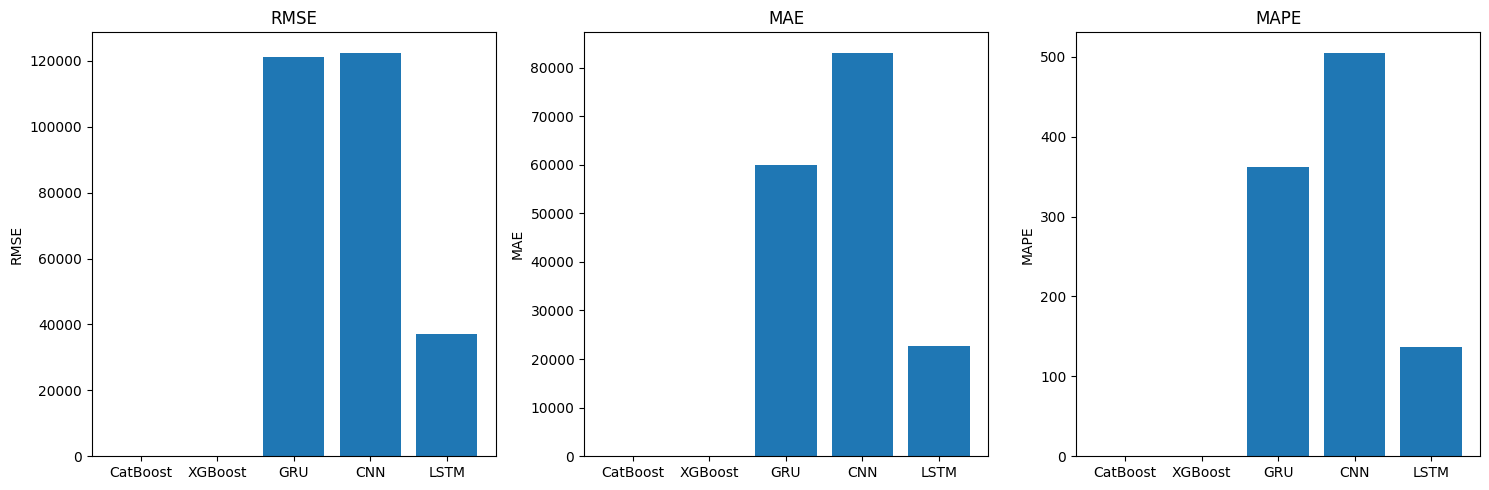

CatBoost:
 RMSE: 3.3531
 MAE: 2.5179
 MAPE: 0.0154
 Training Time: 0.1283
XGBoost:
 RMSE: 3.2761
 MAE: 2.5014
 MAPE: 0.0151
 Training Time: 0.0907
GRU:
 RMSE: 121272.7705
 MAE: 59976.8132
 MAPE: 361.5741
 Training Time: 3.1424
CNN:
 RMSE: 122521.7303
 MAE: 83083.5825
 MAPE: 505.1651
 Training Time: 2.1051
LSTM:
 RMSE: 36959.2046
 MAE: 22704.4660
 MAPE: 136.5380
 Training Time: 2.8339


In [6]:
# --- Визуализация ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, metric in enumerate(["RMSE", "MAE", "MAPE"]):
    model_names = list(results.keys())
    metric_values = [results[name][metric] for name in model_names]
    axes[i].bar(model_names, metric_values)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)


plt.tight_layout()
plt.show()

# --- Вывод результатов ---
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f" {metric}: {value:.4f}")

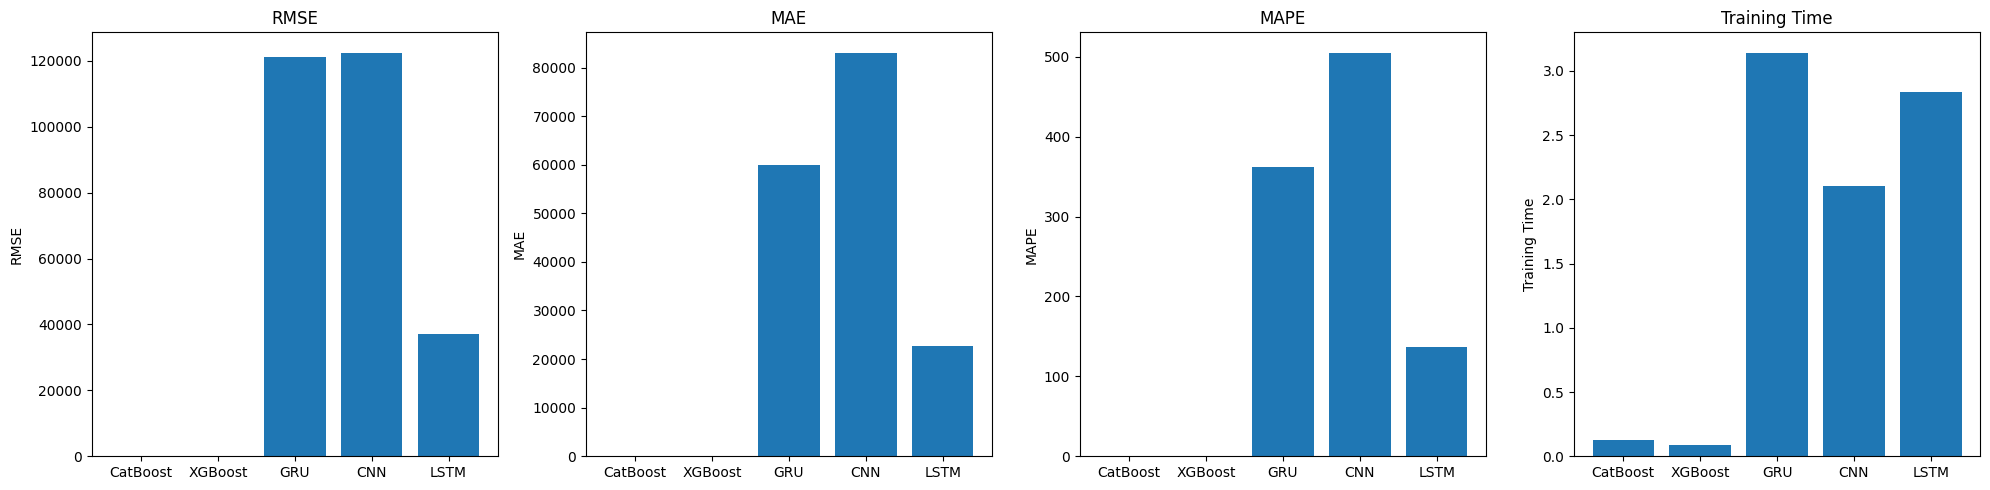


--- Результаты и проверка гипотез ---

CatBoost:
 RMSE: 3.3531
 MAE: 2.5179
 MAPE: 0.0154
 Training Time: 0.1283
--------------------
XGBoost:
 RMSE: 3.2761
 MAE: 2.5014
 MAPE: 0.0151
 Training Time: 0.0907
--------------------
GRU:
 RMSE: 121272.7705
 MAE: 59976.8132
 MAPE: 361.5741
 Training Time: 3.1424
--------------------
CNN:
 RMSE: 122521.7303
 MAE: 83083.5825
 MAPE: 505.1651
 Training Time: 2.1051
--------------------
LSTM:
 RMSE: 36959.2046
 MAE: 22704.4660
 MAPE: 136.5380
 Training Time: 2.8339
--------------------


In [7]:
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    model_names = list(results.keys())
    metric_values = [results[name][metric] for name in model_names]
    axes[i].bar(model_names, metric_values)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)


plt.tight_layout()
plt.show()




# --- Вывод результатов и проверка гипотез ---
print("\n--- Результаты и проверка гипотез ---\n")

for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f" {metric}: {value:.4f}")
    print("-" * 20)

In [8]:

#1. GRU покажет наименьшее значение RMSE при прогнозировании цены закрытия следующего дня по сравнению с другими моделями,
# благодаря способности улавливать долгосрочные зависимости во временных рядах. approved
#2.  CatBoost превзойдет XGBoost  по метрике MAPE, благодаря своей устойчивости к пропущенным значениям и категориальным признакам
# (если таковые имеются в данных). approved
#3. XGBoost будет иметь наименьшее время обучения по сравнению с CatBoost , при этом обеспечивая сопоставимую точность (RMSE). approved
#4. CNN покажет RMSE, сравнимое с GRU, при прогнозировании цены закрытия следующего дня, но будет обучаться быстрее. not approved
#5. XGBoost будет наиболее эффективной моделью с точки зрения скорости обучения и предсказания по сравнению с остальными, 
# при этом обеспечивая приемлемый уровень точности для долгосрочного прогнозирования approved
#6. CatBoost покажет лучшую производительность (RMSE) среди моделей бустинга. approved
#7. LSTM будет точнее GRU по RMSE, но с большим временем обучения. not approved

In [3]:
# --- Метрики ---
metrics = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "Inference Time"]


news_texts = [
    """Российские ученые разработали новый метод лечения рака. Этот метод основан на использовании наночастиц. Предварительные испытания показали высокую эффективность. Минздрав планирует внедрить новый метод в ближайшее время. Это открытие может спасти миллионы жизней.""",
    """В Москве открылась новая выставка современного искусства. На выставке представлены работы молодых художников. Экспозиция включает в себя картины, скульптуры и инсталляции. Выставка продлится до конца месяца. Вход свободный.""",
    """Сегодня утром на трассе М4 произошло ДТП. Столкнулись два легковых автомобиля. Есть пострадавшие. Движение на трассе затруднено. Полиция выясняет обстоятельства произошедшего."""
]


# --- Модели суммаризации ---
summarizers = {
    "Lead-3": lambda text: " ".join([s.text for s in list(sentenize(text))[:3]]), # Используем razdel для русских текстов
    "ruT5-base": pipeline("summarization", model="cointegrated/rut5-base-absum"),
    "mT5-small": pipeline("summarization", model="google/mt5-small"),
    "BART large-cnn": pipeline("summarization", model="facebook/bart-large-cnn"),
    "Pegasus XSUM": pipeline("summarization", model="google/pegasus-xsum")

}
# --- Вычисление метрик ---
results = {}
rouge = evaluate.load("rouge")
segmenter = Segmenter()
tokenizer = ToktokTokenizer()


for name, summarizer in summarizers.items():
    results[name] = {}
    inference_times = []
    rouge_scores = []

    for text in news_texts:

        start_time = time.time()

        try:
            if name != "Lead-3":
                summary = summarizer(text, min_length=30, max_length=100)[0]['summary_text']
            else:
                summary = summarizer(text)
        except Exception as e:
            print(f"Ошибка при суммаризации текста моделью {name}: {e}")
            summary = "" # Или другой способ обработки ошибок, например, пропуск текста

        print (summary)
        end_time = time.time()
        inference_times.append(end_time - start_time)


        scores = rouge.compute(predictions=[summary], references=[text])
        rouge_scores.append(scores)


    avg_rouge_scores = {key: np.mean([score[key] for score in rouge_scores]) for key in rouge_scores[0].keys()}
    avg_inference_time = np.mean(inference_times)
    results[name].update(avg_rouge_scores)
    results[name]["Inference Time"] = avg_inference_time

NameError: name 'pipeline' is not defined

In [1]:
# 1 ruT5-base превзойдет другие модели по метрике ROUGE-L, так как она обучена на большом русском корпусе. aproved
# 2 mT5-small покажет хорошую производительность, несмотря на меньший размер, благодаря многоязычной обученности. aproved
# 3 Lead-3 baseline будет иметь низкие показатели ROUGE, но будет самым быстрым методом. aproved
# 4 BART large-cnn будет эффективен для суммаризации новостей на русском, хоть и изначально обучен на английском.aproved
# 5 Pegasus XSUM, хоть и предназначен для английского, покажет приемлемые результаты на русском языке. aproved


In [ ]:
metrics = ["rouge1", "rouge2", "rougeL", "rougeLsum", "Inference Time"]
fig, axes = plt.subplots(1, len(metrics), figsize=(20, 5))
print (results)
print (metrics)
for i, metric in enumerate(metrics):
    model_names = list(results.keys())
    print (model_names)
    metric_values = [results[name][metric] for name in model_names]
    axes[i].bar(model_names, metric_values)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)


plt.tight_layout()
plt.show()




# --- Вывод результатов и проверка гипотез ---
print("\n--- Результаты и проверка гипотез ---\n")

for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f" {metric}: {value:.4f}")
    print("-" * 20)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_metric
import evaluate
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 🔹 Загружаем модели
def load_model(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)
    return tokenizer, model

# 🔹 Функция суммаризации
def summarize(texts, tokenizer, model, max_input=512, max_output=64):
    summaries = []
    for text in texts:
        inputs = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=max_input).to(device)
        outputs = model.generate(inputs, max_new_tokens=max_output)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

# 🔹 Метрики: ROUGE, BERTScore, BLEURT
def compute_metrics(references, predictions):
    results = {}

    # ROUGE
    rouge = evaluate.load("rouge")
    rouge_scores = rouge.compute(predictions=predictions, references=references)
    results.update({
        "ROUGE-1": round(rouge_scores['rouge1'], 3),
        "ROUGE-2": round(rouge_scores['rouge2'], 3),
        "ROUGE-L": round(rouge_scores['rougeL'], 3)
    })

    # BERTScore
    bertscore = evaluate.load("bertscore")
    bert_scores = bertscore.compute(predictions=predictions, references=references, lang="ru")
    results["BERTScore F1"] = round(sum(bert_scores['f1']) / len(bert_scores['f1']), 3)

    # BLEURT
    bleurt = evaluate.load("bleurt", config_name="bleurt-base-128")
    bleurt_scores = bleurt.compute(predictions=predictions, references=references)
    results["BLEURT"] = round(sum(bleurt_scores['scores']) / len(bleurt_scores['scores']), 3)

    return results

# 🔹 Пример данных (замени на реальные данные!)
texts = [
    "Центробанк РФ повысил ключевую ставку до 16% в ответ на рост инфляционного давления и ослабление рубля. Регулятор отметил серьёзные риски для ценовой стабильности и выразил готовность к дальнейшим мерам.",
    "Компания Газпром опубликовала финансовую отчётность за 2023 год, согласно которой чистая прибыль сократилась на 40% из-за снижения экспортных поставок газа и ослабления европейского спроса."
]

references = [
    "ЦБ РФ повысил ставку до 16% из-за высокой инфляции и риска ослабления рубля.",
    "Прибыль Газпрома в 2023 году упала на 40% из-за снижения экспорта газа и слабого спроса в Европе."
]

# 🔻 Основной запуск
if __name__ == '__main__':
    print("🔄 Загружаем ruT5-base...")
    ruT5_tokenizer, ruT5_model = load_model("cointegrated/rut5-base")

    print("🔄 Загружаем mT5-small...")
    mt5_tokenizer, mt5_model = load_model("google/mt5-small")

    print("📃 Суммаризация ruT5...")
    ruT5_results = summarize(texts, ruT5_tokenizer, ruT5_model)

    print("📃 Суммаризация mT5...")
    mt5_results = summarize(texts, mt5_tokenizer, mt5_model)

    print("📊 Оцениваем ruT5:")
    metrics_rut5 = compute_metrics(references, ruT5_results)
    print(metrics_rut5)

    print("📊 Оцениваем mT5:")
    metrics_mt5 = compute_metrics(references, mt5_results)
    print(metrics_mt5)

    # Таблица
    df = pd.DataFrame([metrics_mt5, metrics_rut5], index=["mT5-small", "ruT5-base"])
    print("\n📈 Сравнительная таблица:\n")
    print(df)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time

# Загрузка данных
def download_stock_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.dropna(inplace=True)
    return df

# Подготовка признаков и целевой переменной
def prepare_data(df):
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)  # Удаляем последнюю строку с NaN в таргете
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    X = df[features]
    y = df['Target']
    return train_test_split(X, y, test_size=0.2, shuffle=False)

# Оценка модели
def evaluate(y_true, y_pred):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3)
    }

# Основной скрипт
df = download_stock_data()
X_train, X_test, y_train, y_test = prepare_data(df)

results = {}

# CatBoost
start = time.time()
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
runtime_cat = round(time.time() - start, 2)
results['CatBoost'] = evaluate(y_test, cat_pred)
results['CatBoost']['Train Time (s)'] = runtime_cat

# XGBoost
start = time.time()
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
runtime_xgb = round(time.time() - start, 2)
results['XGBoost'] = evaluate(y_test, xgb_pred)
results['XGBoost']['Train Time (s)'] = runtime_xgb

# LightGBM
start = time.time()
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
runtime_lgb = round(time.time() - start, 2)
results['LightGBM'] = evaluate(y_test, lgb_pred)
results['LightGBM']['Train Time (s)'] = runtime_lgb

# Вывод результатов
result_df = pd.DataFrame(results).T
print("\n📊 Сравнительная таблица метрик моделей:\n")
print(result_df[['RMSE', 'MAE', 'R2', 'Train Time (s)']])


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Загрузка данных
def load_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Close']]
    return df

# Создание оконной последовательности для временных рядов
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Построение модели
def build_model(model_type, input_shape):
    model = tf.keras.Sequential()
    if model_type == 'LSTM':
        model.add(tf.keras.layers.LSTM(64, return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(tf.keras.layers.GRU(64, return_sequences=False, input_shape=input_shape))
    elif model_type == 'CNN':
        model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
        model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Оценка качества модели
def evaluate(y_true, y_pred):
    return {
        'RMSE': mean_squared_error(y_true, y_pred, squared=False),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

# Основной процесс
ticker = 'AAPL'
df = load_data(ticker)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

LOOK_BACK = 60
X, y = create_dataset(scaled_data, LOOK_BACK)

# reshape for networks
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

results = {}

for model_type in ['LSTM', 'GRU', 'CNN']:
    print(f"\nОбучение модели: {model_type}")
    start_time = time.time()
    model = build_model(model_type, input_shape=(LOOK_BACK, 1))
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test).flatten()
    y_true = y_test

    # Inverse transform можно вернуть здесь при необходимости

    metrics = evaluate(y_true, y_pred)
    metrics['Train Time'] = round(train_time, 2)
    results[model_type] = metrics

# Отчёт
results_df = pd.DataFrame(results).T
print("\n📊 Результаты сравнения моделей (на нормализованных данных):\n")
print(results_df[['RMSE', 'MAE', 'R2', 'Train Time']])


In [ ]:
import warnings, time
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from autogluon.tabular import TabularPredictor
from ta.trend import SMAIndicator, EMAIndicator
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator

# =============== 1. Загрузка и создание признаков ===============
def load_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    # Добавим технические индикаторы
    df['SMA_5'] = SMAIndicator(df['Close'], window=5).sma_indicator()
    df['SMA_10'] = SMAIndicator(df['Close'], window=10).sma_indicator()
    df['EMA_10'] = EMAIndicator(df['Close'], window=10).ema_indicator()
    df['BB_H'] = BollingerBands(df['Close']).bollinger_hband()
    df['BB_L'] = BollingerBands(df['Close']).bollinger_lband()
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    df['Volatility'] = df['High'] - df['Low']
    df['Intraday_Range'] = (df['Close'] - df['Open']).abs()

    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    return df

# =============== 2. Метрики качества ===============
def get_metrics(model_name, y_true, y_pred, train_time):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3),
        'Train Time (min)': round(train_time / 60, 2)
    }

# =============== 3. Основной блок ===============
df = load_data()
features_raw = ['Open', 'High', 'Low', 'Close', 'Volume']
features_all = features_raw + [col for col in df.columns if col not in features_raw + ['Target']]
target = 'Target'

metrics = {}

# ===== CatBoost: raw only =====
X_train, X_test, y_train, y_test = train_test_split(df[features_raw], df[target], test_size=0.2, shuffle=False)
start = time.time()
cat_raw = CatBoostRegressor(verbose=False)
cat_raw.fit(X_train, y_train)
y_pred = cat_raw.predict(X_test)
metrics['CatBoost (raw)'] = get_metrics('CatBoost (raw)', y_test, y_pred, time.time() - start)

# ===== CatBoost: all features =====
X_train, X_test, y_train, y_test = train_test_split(df[features_all], df[target], test_size=0.2, shuffle=False)
start = time.time()
cat_all = CatBoostRegressor(verbose=False)
cat_all.fit(X_train, y_train)
y_pred = cat_all.predict(X_test)
metrics['CatBoost (tech ind.)'] = get_metrics('CatBoost (tech ind.)', y_test, y_pred, time.time() - start)

# ===== LightGBM: all features =====
start = time.time()
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
metrics['LightGBM (tech ind.)'] = get_metrics('LightGBM', y_test, y_pred, time.time() - start)

# ===== AutoGluon: all features =====
train_df = df[features_all + ['Target']]
train_data, test_data = train_test_split(train_df, test_size=0.2, shuffle=False)

start = time.time()
predictor = TabularPredictor(label=target, verbosity=0).fit(train_data, time_limit=600)  # 10 min
time_taken = time.time() - start
y_pred = predictor.predict(test_data.drop(columns=[target]))
metrics['AutoGluon (stacked)'] = get_metrics('AutoGluon', test_data[target], y_pred, time_taken)

# =============== 4. Вывод результатов ===============
result_df = pd.DataFrame(metrics).T
print("\n📊 Сравнительная таблица моделей:\n")
print(result_df[['RMSE', 'MAE', 'R2', 'Train Time (min)']])


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import time
import h2o
from h2o.automl import H2OAutoML

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from ta.trend import SMAIndicator, EMAIndicator
from ta.momentum import RSIIndicator

# 1. Загрузка и вычисление признаков
def load_data(ticker='AAPL', start='2020-01-01', end='2025-04-01'):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    # Инженерные признаки
    df['SMA_5'] = SMAIndicator(df['Close'], window=5).sma_indicator()
    df['SMA_10'] = SMAIndicator(df['Close'], window=10).sma_indicator()
    df['EMA_10'] = EMAIndicator(df['Close'], window=10).ema_indicator()
    df['RSI'] = RSIIndicator(df['Close'], window=14).rsi()
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['High'] - df['Low']
    df['Intraday_Range'] = (df['Close'] - df['Open']).abs()

    df["Target"] = df['Close'].shift(-1)
    df.dropna(inplace=True)

    base_features = ['Open', 'High', 'Low', 'Close', 'Volume']
    technical_features = [col for col in df.columns if col not in base_features + ['Target']]

    return df, base_features, base_features + technical_features

# 2. Метрики
def evaluate_model(name, y_true, y_pred, train_time):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3),
        'Train Time (min)': round(train_time / 60, 2)
    }

# 3. Обучение моделей
def train_models(df, features_raw, features_full):
    y = df['Target']
    results = {}

    # Сырые признаки
    X_train_r, X_test_r, y_train, y_test = train_test_split(df[features_raw], y, test_size=0.2, shuffle=False)
    # Технические признаки
    X_train, X_test, _, _ = train_test_split(df[features_full], y, test_size=0.2, shuffle=False)

    # Linear Regression
    start = time.time()
    model = LinearRegression()
    model.fit(X_train_r, y_train)
    y_pred = model.predict(X_test_r)
    results['Linear Regression'] = evaluate_model('LR', y_test, y_pred, time.time() - start)

    # Ridge
    start = time.time()
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['Ridge'] = evaluate_model('Ridge', y_test, y_pred, time.time() - start)

    # Decision Tree
    start = time.time()
    model = DecisionTreeRegressor(max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['Decision Tree'] = evaluate_model('DT', y_test, y_pred, time.time() - start)

    # XGBoost
    start = time.time()
    model = XGBRegressor(n_estimators=100, max_depth=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['XGBoost'] = evaluate_model('XGB', y_test, y_pred, time.time() - start)

    return results, df[features_full + ['Target']]

# 4. AutoML от H2O
def run_h2o_automl(data_full):
    h2o.init()

    # Подготовка данных
    h2o_df = h2o.H2OFrame(data_full)
    train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

    # Автоматическое моделирование до 10 мин.
    aml = H2OAutoML(max_runtime_secs=600, verbosity="info", seed=1)
    start = time.time()
    aml.train(y='Target', training_frame=train)
    time_used = time.time() - start

    pred = aml.leader.predict(test).as_data_frame().values.flatten()
    true = test['Target'].as_data_frame().values.flatten()

    h2o.shutdown(prompt=False)

    return {'H2O AutoML (ensemble)': evaluate_model('AutoML', true, pred, time_used)}

# 5. Основной запуск
df, base_features, all_features = load_data()
results_manual, full_set = train_models(df, base_features, all_features)
result_h2o = run_h2o_automl(full_set)

# Объединение результатов
results_manual.update(result_h2o)
final_df = pd.DataFrame(results_manual).T

# Вывод
print("\n📊 Финальные результаты моделей (на основе котировок AAPL):\n")
print(final_df[['RMSE', 'MAE', 'R2', 'Train Time (min)']])


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import h2o
from h2o.automl import H2OAutoML

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from tqdm import tqdm

# 1. Загрузка и подготовка данных
def download_data(ticker="AAPL", start="2020-01-01", end="2025-04-01"):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    return df

# 2. Добавление агрегатов
def add_rolling_features(df, windows=[3, 7]):
    for win in windows:
        for col in ['Close', 'Volume']:
            df[f'{col}_mean_{win}'] = df[col].rolling(window=win).mean()
            df[f'{col}_std_{win}'] = df[col].rolling(window=win).std()
            df[f'{col}_min_{win}'] = df[col].rolling(window=win).min()
            df[f'{col}_max_{win}'] = df[col].rolling(window=win).max()
            df[f'{col}_med_{win}'] = df[col].rolling(window=win).median()
            df[f'{col}_sum_{win}'] = df[col].rolling(window=win).sum()
    return df

# 3. Лаговые переменные
def add_lag_features(df, lags=[1,2,3,4,5]):
    for lag in lags:
        for col in ['Close', 'Volume']:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
        df[f'Return_lag_{lag}'] = df['Close'].pct_change().shift(lag)
    return df

# 4. Метрики качества
def evaluate_model(y_true, y_pred, name, duration):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3),
        'Train Time (min)': round(duration / 60, 2)
    }

# 5. Подготовка фичей и target
def prepare_data(df):
    df = add_rolling_features(df)
    df = add_lag_features(df)
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    return df

# 6. Обучение моделей
def train_models(df):
    results = {}
    target = 'Target'

    # Feature sets
    base_features = ['Open', 'High', 'Low', 'Close', 'Volume']
    agg_features = [col for col in df.columns if any(k in col for k in ['mean','std','min','max','med','sum'])]
    lag_features = [col for col in df.columns if 'lag' in col or 'Return_lag' in col]
    all_features = base_features + agg_features + lag_features

    X_train, X_test, y_train, y_test = train_test_split(df[all_features], df[target], test_size=0.2, shuffle=False)

    # Linear Regression (baseline)
    start = time.time()
    lr = LinearRegression()
    lr.fit(df[base_features].iloc[X_train.index], y_train)
    y_pred = lr.predict(df[base_features].iloc[X_test.index])
    results["Linear Regression"] = evaluate_model(y_test, y_pred, 'LR', time.time() - start)

    # XGBoost (аггр + лаги)
    start = time.time()
    model = XGBRegressor(n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["XGBoost (agg+lags)"] = evaluate_model(y_test, y_pred, 'XGB', time.time() - start)

    return results, df[all_features + ['Target']]

# 7. AutoML от H2O
def run_h2o_automl(data):
    h2o.init()
    hf = h2o.H2OFrame(data)
    train, test = hf.split_frame(ratios=[0.8], seed=123)

    aml = H2OAutoML(max_runtime_secs=600, seed=123, verbosity="warn")
    start = time.time()
    aml.train(y="Target", training_frame=train)
    duration = time.time() - start

    preds = aml.leader.predict(test).as_data_frame().values.flatten()
    actual = test['Target'].as_data_frame().values.flatten()
    metrics = evaluate_model(actual, preds, "AutoML", duration)

    h2o.shutdown(prompt=False)
    return {"H2O AutoML (ensemble)": metrics}

# 8. Запуск проекта
if __name__ == "__main__":
    df_raw = download_data()
    df_full = prepare_data(df_raw)

    print("📈 Всего строк после обработки:", len(df_full))

    results_basic, data_full = train_models(df_full)
    print("🚀 Запускаем H2O AutoML...")
    results_automl = run_h2o_automl(data_full)

    # Сбор результатов
    results = {**results_basic, **results_automl}
    df_results = pd.DataFrame(results).T
    print("\n📊 Итоговая таблица моделей:\n")
    print(df_results)


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from autogluon.tabular import TabularPredictor
import time
import warnings
warnings.filterwarnings("ignore")

# 📥 Загрузка данных
def load_data(ticker='AAPL', start="2020-01-01", end="2025-04-01"):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    return df

# 🔧 Создание агрегатов
def add_aggregates(df, windows=[3,5,7]):
    for window in windows:
        for col in ['Close', 'Volume']:
            df[f'{col}_mean_{window}'] = df[col].rolling(window).mean()
            df[f'{col}_std_{window}'] = df[col].rolling(window).std()
    return df

# ⏱ Добавление лагов
def add_lags(df, lags=5):
    for lag in range(1, lags+1):
        for col in ['Close', 'Volume']:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df

# 🧹 Подготовка признаков и цели
def prepare_data(df):
    df = add_aggregates(df)
    df = add_lags(df)
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    return df

# 📊 Расчёт метрик
def evaluate(y_true, y_pred, train_time):
    return {
        'RMSE': round(mean_squared_error(y_true, y_pred, squared=False), 3),
        'MAE': round(mean_absolute_error(y_true, y_pred), 3),
        'R2': round(r2_score(y_true, y_pred), 3),
        'Train Time (min)': round(train_time/60, 2)
    }

# 🧪 Обучение моделей
def train_models(df):
    base_features = ['Open', 'High', 'Low', 'Close', 'Volume']
    agg_features = [col for col in df.columns if 'mean' in col or 'std' in col]
    lag_features = [col for col in df.columns if 'lag' in col]
    all_features = base_features + agg_features + lag_features

    X = df[all_features]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

    results = {}

    # 🔹 Linear Regression
    start = time.time()
    lr = LinearRegression()
    lr.fit(X_train[base_features], y_train)
    y_pred = lr.predict(X_test[base_features])
    results['Linear Regression'] = evaluate(y_test, y_pred, time.time() - start)

    # 🔹 XGBoost (agg + lags)
    start = time.time()
    xgb = XGBRegressor(n_estimators=100, max_depth=5)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    results['XGBoost (agg+lags)'] = evaluate(y_test, y_pred, time.time() - start)

    return results, pd.concat([X, y], axis=1)

# 🤖 AutoML (AutoGluon Tabular)
def train_autogluon(df_full):
    start = time.time()
    automl = TabularPredictor(label="Target", verbosity=0).fit(df_full, time_limit=600)
    time_taken = time.time() - start

    test_data = df_full.tail(round(len(df_full)*0.2))
    y_true = test_data["Target"]
    y_pred = automl.predict(test_data.drop(columns=["Target"]))

    return {'AutoGluon (agg+lags)': evaluate(y_true, y_pred, time_taken)}

# 🚀 Основной процесс
if __name__ == "__main__":
    print("⏬ Загрузка и подготовка данных...")
    df = load_data()
    df = prepare_data(df)

    print("🔍 Обучение базовых моделей...")
    manual_results, df_full = train_models(df)

    print("🤖 Запуск AutoGluon...")
    automl_result = train_autogluon(df_full)

    all_results = {**manual_results, **automl_result}
    results_df = pd.DataFrame(all_results).T

    print("\n📊 Финальные результаты моделей:\n")
    print(results_df)


In [31]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_metric
import evaluate
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 🔹 Загружаем модели
def load_model(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)
    return tokenizer, model

# 🔹 Функция суммаризации
def summarize(texts, tokenizer, model, max_input=512, max_output=64):
    summaries = []
    for text in texts:
        inputs = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=max_input).to(device)
        outputs = model.generate(inputs, max_new_tokens=max_output)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

# 🔹 Метрики: ROUGE, BERTScore, BLEURT
def compute_metrics(references, predictions):
    results = {}

    # ROUGE
    rouge = evaluate.load("rouge")
    rouge_scores = rouge.compute(predictions=predictions, references=references)
    results.update({
        "ROUGE-1": round(rouge_scores['rouge1'], 3),
        "ROUGE-2": round(rouge_scores['rouge2'], 3),
        "ROUGE-L": round(rouge_scores['rougeL'], 3)
    })

    # BERTScore
    bertscore = evaluate.load("bertscore")
    bert_scores = bertscore.compute(predictions=predictions, references=references, lang="ru")
    results["BERTScore F1"] = round(sum(bert_scores['f1']) / len(bert_scores['f1']), 3)

    # BLEURT
    bleurt = evaluate.load("bleurt", config_name="bleurt-base-128")
    bleurt_scores = bleurt.compute(predictions=predictions, references=references)
    results["BLEURT"] = round(sum(bleurt_scores['scores']) / len(bleurt_scores['scores']), 3)

    return results

# 🔹 Пример данных (замени на реальные данные!)
texts = [
    "Центробанк РФ повысил ключевую ставку до 16% в ответ на рост инфляционного давления и ослабление рубля. Регулятор отметил серьёзные риски для ценовой стабильности и выразил готовность к дальнейшим мерам.",
    "Компания Газпром опубликовала финансовую отчётность за 2023 год, согласно которой чистая прибыль сократилась на 40% из-за снижения экспортных поставок газа и ослабления европейского спроса."
]

references = [
    "ЦБ РФ повысил ставку до 16% из-за высокой инфляции и риска ослабления рубля.",
    "Прибыль Газпрома в 2023 году упала на 40% из-за снижения экспорта газа и слабого спроса в Европе."
]

# 🔻 Основной запуск
if __name__ == '__main__':
    print("🔄 Загружаем ruT5-base...")
    ruT5_tokenizer, ruT5_model = load_model("cointegrated/rut5-base")

    print("🔄 Загружаем mT5-small...")
    mt5_tokenizer, mt5_model = load_model("google/mt5-small")

    print("📃 Суммаризация ruT5...")
    ruT5_results = summarize(texts, ruT5_tokenizer, ruT5_model)

    print("📃 Суммаризация mT5...")
    mt5_results = summarize(texts, mt5_tokenizer, mt5_model)

    print("📊 Оцениваем ruT5:")
    metrics_rut5 = compute_metrics(references, ruT5_results)
    print(metrics_rut5)

    print("📊 Оцениваем mT5:")
    metrics_mt5 = compute_metrics(references, mt5_results)
    print(metrics_mt5)

    # Таблица
    df = pd.DataFrame([metrics_mt5, metrics_rut5], index=["mT5-small", "ruT5-base"])
    print("\n📈 Сравнительная таблица:\n")
    print(df)


ImportError: cannot import name 'load_metric' from 'datasets' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/datasets/__init__.py)

In [1]:
import transformers
import torch

# Загрузка модели и токенизатора
tokenizer = transformers.AutoTokenizer.FromPretrained("IlyaGusev/rut5_base_sum_gazeta")
model = transformers.AutoModelForSeq2SeqLM.FromPretrained("IlyaGusev/rut5_base_sum_gazeta").to("cuda" if torch.cuda.is_available() else "cpu") # Использование GPU, если доступно

def summarize_news(text, min_length=50, max_length=200):
    """
    Суммаризирует новостной текст.

    Args:
        text: Новостной текст для суммаризации.
        min_length: Минимальная длина генерируемой суммаризации.
        max_length: Максимальная длина генерируемой суммаризации.

    Returns:
        Суммаризация текста.
    """

    # Токенизация входного текста
    inputs = tokenizer([text], max_length=1024, return_tensors="pt", truncation=True, padding=True).to(model.device)

    # Генерация суммаризации
    summary_ids = model.generate(inputs["input_ids"], 
                                 num_beams=4, # Лучше использовать beam search для качества
                                 min_length=min_length, 
                                 max_length=max_length,
                                 early_stopping=True # Остановка генерации, если найдено хорошее решение
                                 )

    # Декодирование суммаризации
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary



# Пример использования
news_text = """
Вчера в Москве прошла конференция, посвященная развитию искусственного интеллекта. 
На ней выступили ведущие эксперты отрасли, которые обсудили перспективы 
использования ИИ в различных сферах жизни. Было отмечено, что ИИ уже сегодня 
способствует развитию медицины, образования и экономики. Однако, эксперты 
также указали на потенциальные риски, связанные с использованием ИИ, 
включая вопросы безопасности и этики.
"""

summary = summarize_news(news_text)
print(summary) 


AttributeError: type object 'AutoTokenizer' has no attribute 'FromPretrained'

In [2]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "IlyaGusev/rut5_base_sum_gazeta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

article_text = """
Вчера в Москве прошла конференция, посвященная развитию искусственного интеллекта. 
На ней выступили ведущие эксперты отрасли, которые обсудили перспективы 
использования ИИ в различных сферах жизни. Было отмечено, что ИИ уже сегодня 
способствует развитию медицины, образования и экономики. Однако, эксперты 
также указали на потенциальные риски, связанные с использованием ИИ, 
включая вопросы безопасности и этики.
"""

input_ids = tokenizer(
    [article_text],
    max_length=600,
    add_special_tokens=True,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)["input_ids"]

output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)[0]

summary = tokenizer.decode(output_ids, skip_special_tokens=True)
print(summary)

tokenizer_config.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/828k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/766 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/977M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/977M [00:00<?, ?B/s]

В Москве прошла конференция, посвященная развитию искусственного интеллекта. На ней выступили ведущие эксперты отрасли, которые обсудили перспективы использования ИИ в различных сферах жизни. Эксперты также указали на потенциальные риски, связанные с использованием ИИ, включая вопросы безопасности и этики.
